<a href="https://colab.research.google.com/github/brazlb00/Pyspark/blob/main/Cruelty_free_Brands.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Libraries

In [ ]:
from pyspark.sql import functions as Func
import pyspark.sql.types as t
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt
spark = SparkSession.builder.getOrCreate()

Path used.

In [ ]:
input_path = '/content/drive/MyDrive/cf_products_with_retailers.csv'
output =  '/content/drive/MyDrive/trusted/cruelty-free-brands'

In [ ]:
schema_csv = t.StructType([
    t.StructField("ID", t.IntegerType()),
    t.StructField("Brand", t.StringType()),
    t.StructField("All Vegan", t.BooleanType()),
    t.StructField("Partial Vegan", t.BooleanType()),
    t.StructField("Bad Parent Companie", t.BooleanType()),
    t.StructField("Black Owned", t.BooleanType()),
    t.StructField("Ultra", t.IntegerType()),
    t.StructField("Sephora", t.IntegerType()),
    t.StructField("Beauty Bay", t.IntegerType()),
    t.StructField("Cult Bealty", t.IntegerType()),
    t.StructField("Nordstrom", t.IntegerType())
])

Data Frame.

In [ ]:
df = spark.read\
  .schema(schema_csv)\
  .option('delimiter', ',')\
  .option('header', 'true')\
  .csv(input_path)

In [ ]:
df.show()

+---+--------------------+---------+-------------+-------------------+-----------+-----+-------+----------+-----------+---------+
| ID|               Brand|All Vegan|Partial Vegan|Bad Parent Companie|Black Owned|Ultra|Sephora|Beauty Bay|Cult Bealty|Nordstrom|
+---+--------------------+---------+-------------+-------------------+-----------+-----+-------+----------+-----------+---------+
|  0|           100% Pure|    false|        false|              false|      false|    0|      0|         0|          0|        0|
|  1|              100BON|     true|        false|              false|      false|    0|      0|         0|          0|        0|
|  2|     1121 Apothecary|     true|        false|              false|      false|    0|      0|         0|          0|        0|
|  3|            21 Drops|     true|        false|              false|      false|    0|      0|         0|          0|        0|
|  4|                  2B|    false|        false|              false|      false|    0|  

Brands Analysed

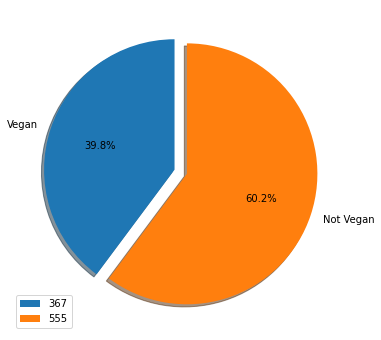

In [ ]:
#DATA
vegan= df.filter(Func.col("All Vegan") == 'true').count() # Value represent the count of vegans brands analysed
notvegan= df.filter(Func.col("All Vegan") == 'false').count() # Value represent the count of not vegans brands analysed
explode=[0, 0.1]  #only "explode" the 2nd slice
x = [vegan, notvegan] #both in a list
label = ['Vegan', 'Not Vegan']

#PLOT
fig, ax = plt.subplots(figsize=(6,6))  #figure definition
ax.pie(x, explode=explode, autopct='%1.1f%%', shadow=True, startangle=90, labels=label)
#autopct: The vallues will be placed inside the wedge
#shadow: shadow behind
#startangle: graph angle
#labels= simple description

#LEGEND
ax.legend(x, loc="lower left", )

plt.show()

Vegan Data Frame

In [ ]:
Vegans = df.filter(Func.col("All Vegan") == 'true')
Vegans.count()

367

Vegan Brands

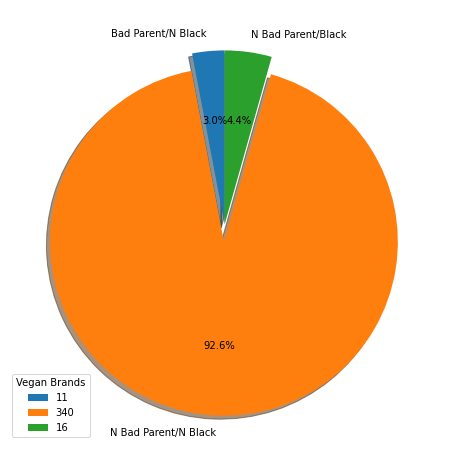

In [ ]:
#DATA
NotBP_Black = Vegans.filter(Func.col("Bad Parent Companie") == 'false').filter(Func.col("Black Owned") == 'true').count()
BP_NotBlack = Vegans.filter(Func.col("Bad Parent Companie")).count()
NotBP_NotBlack = Vegans.filter(Func.col("Bad Parent Companie") == 'false').filter(Func.col("Black Owned") == 'false').count()

label = ['Bad Parent/N Black', 'N Bad Parent/N Black', 'N Bad Parent/Black']

explode=[0,0.1,0]
x = [BP_NotBlack, NotBP_NotBlack, NotBP_Black]

#PLOT
fig, ax = plt.subplots(figsize=(8,8))
ax.pie(x, explode=explode, autopct='%1.1f%%', shadow=True, startangle=90, labels=label)

#LEGEND
ax.legend(x, title="Vegan Brands", loc="lower left", )

plt.show()



Partial Vegan Companies

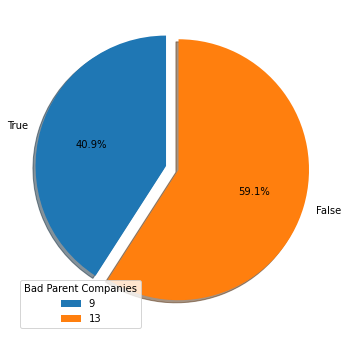

In [ ]:
#DATAS
PV_NotBP = df.filter((Func.col("Partial Vegan")=='true')&(Func.col("Bad Parent Companie")=='true')).count()
PV_B = df.filter((Func.col("Partial Vegan")=='true')&(Func.col("Bad Parent Companie")=='false')).count()
explode=[0.1,0]
x = [PV_NotBP, PV_B]
label = ['True', 'False']
#PLOT
fig, ax = plt.subplots(figsize=(6,6))
ax.pie(x, explode=explode, autopct='%1.1f%%', shadow=True, startangle=90, labels=label)

#LEGEND
ax.legend(x, title="Bad Parent Companies", loc="lower left", )

plt.show()




Not Vegans Brands

In [ ]:
NotVegans = df.filter(Func.col("All Vegan")== 'false').filter(Func.col("Partial Vegan") == 'false')
NotVegans.count()

533

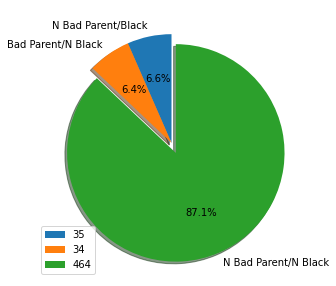

In [ ]:
#DATA
NV_NotBP_Black = NotVegans.filter(Func.col("Bad Parent Companie")=='false').filter(Func.col("Black Owned")=='true').count()
NV_BP_NotBlack = NotVegans.filter(Func.col("Bad Parent Companie")=='true').filter(Func.col("Black Owned")=='false').count()
NV_NotBP_NotBlack = NotVegans.filter(Func.col("Bad Parent Companie")=='false').filter(Func.col("Black Owned")=='false').count()
explode =[0, 0, 0.1]
x = [NV_NotBP_Black, NV_BP_NotBlack, NV_NotBP_NotBlack]
label =['N Bad Parent/Black', 'Bad Parent/N Black', 'N Bad Parent/N Black']

#PLOT
fig, ax = plt.subplots(figsize=(5,5))
ax.pie(x, explode=explode, autopct='%1.1f%%', shadow=True, startangle=90, labels=label)

#LEGEND
ax.legend(x, loc="lower left", )

plt.show()

Black Owned Companies

In [ ]:
Black = df.filter(Func.col("Black Owned")=='true')

51

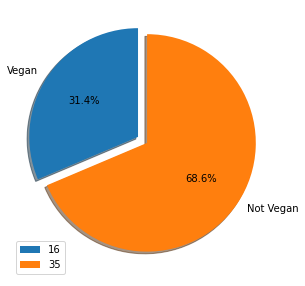

In [ ]:
#DATA
blackvegan = Black.filter(Func.col("All Vegan")=='true').count()
blackNvegan = Black.filter(Func.col("All Vegan")=='false').count()
explode=[0.1,0]
x = [blackvegan, blackNvegan]
label = ['Vegan', 'Not Vegan']

#PLOT
fig, ax = plt.subplots(figsize=(5,5))
ax.pie(x, explode=explode, autopct='%1.1f%%', shadow=True, startangle=90, labels=label)

#LEGEND
ax.legend(x, loc="lower left", )
